
# ¿SON LOS RETIROS DE LOS FONDOS DE AFP LA CAUSA DE LA INFLACIÓN EN CHILE? # 


## Introducción ##  
El **cuarto retiro** de fondos de las AFP es un tema relevante en discusión debido a que la **Comisión de Constitución, Legislación, Justicia y Reglamento** de la Cámara de Diputados aprobó el 01 de septiembre en general la iniciativa que fusiona tres proyectos presentados por diputados **PH, RN e Ind.** que buscan el retiro del 10% de los fondos y de otros tres **PH, RN y UDI** que buscan el retiro del 100% de los fondos. Hasta el 15 de septiembre hay plazo para presentar indicaciones y el 22 de septiembre se votará en particular en la Comisión. 

Es en este contexto de debate en la Cámara de Diputados que el presidente del **Banco Central** presenta el Informe de Política Monetaria del mes de septiembre a la **Comisión de Hacienda** del Senado, en la que plantea preocupación respecto a las consecuencias que tendría la aprobación de un cuarto retiro de fondos sobre la inflación, además de informar el aumento en la **Tasa de Política Monetaria**, pasando de un 0,75% a 1,50%, lo que equivale un aumento del 100%.

Anteriormente ya se han realizado tres retiros de fondo desde las AFP, todos por un monto equivalente al 10% del saldo ahorrado con algunas condiciones en cuanto a los montos a retirar desde las cuentas de cotización obligatoria, iniciando las solicitudes de retiro en las siguientes fechas:  
* Primer retiro: 30 julio 2020  
* Segundo retiro: 10 diciembre 2020  
* Tercer retiro: 03 mayo 2021  

El objetivo del presente trabajo es identificar si los retiros desde los fondos de las AFP son o no la causa de la inflación en Chile.

# Desarrollo #  
## Retiros de las AFP ##  
Evidenciar un aumento en la inflación atribuible a los retiros de las AFP implica identificar un aumento del IPC en los meses en que más se inyecta dinero al mercado. El Gráfico 1 presenta los montos pagados mensualmente, en billones de pesos, por cada retiro considerando el mes 0 como el mes en que se realizó el primer pago.

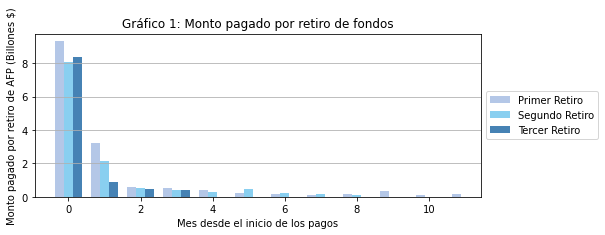

In [1]:
#@title Gráfico 1: Monto pagado mensualmente por retiros desde las AFP
#Cargar información de los montos pagados mensualmente por los retiros de las AFP
#Fuente Primer Retiro: https://www71.spensiones.cl/portal/institucional/594/w3-propertyvalue-10398.html
#Fuente Segundo Retiro: https://www71.spensiones.cl/portal/institucional/594/w3-propertyvalue-10402.html
#Fuente Tercer Retiro: https://www71.spensiones.cl/portal/institucional/594/w3-propertyvalue-10421.html

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Se carga a un dataframe la información almacenada en el archivo de la ruta, creado para este análisis
ruta = "https://raw.githubusercontent.com/redzline/diplodocus/main/base_retiros.csv"
df2 = pd.read_csv(ruta,sep=";", decimal=",")


######### INICIO DEL GRÁFICO DE BARRAS #########
#Color y variable i para colores por año
color=["#c3c9c3","#B4C7E7","#89CFF0","#4682B4","#1D2951"]
ancho = 0.25
i=0

plt.figure(figsize=(8,3))

#Variable para guardar los montos retirados en el primer y segundo mes de cada retiro
montos_retiros=[]

#Se crea una serie para cada retiro. El eje X se crea para cada mes de ordinalmente para cada retiro 
for retiro in df2.drop_duplicates(subset = ["Retiro"])["Retiro"]:
  retiros_aux=[]
  plt.bar(np.arange(len(df2.loc[df2["Retiro"]==retiro].drop_duplicates(subset = ["Mes"])["Mes"]))+ancho*i-0.25, df2.loc[df2['Retiro']==retiro]["Monto Pagado"]/1000000, label=retiro, width=ancho, color=color[i+1])
  for monto in df2.loc[df2["Retiro"]==retiro]["Monto Pagado"][0:2].index:
    retiros_aux.append((round(df2.loc[monto,"Monto Pagado"]*100/df2.loc[df2["Retiro"]==retiro]["Monto Pagado"].sum())))
  retiros_aux.append((100-(retiros_aux[0]+retiros_aux[1])))
  montos_retiros.append(retiros_aux)
  i+=1

#Configuración del gráfico de barras
plt.ylabel('Monto pagado por retiro de AFP (Billones $)')
plt.xlabel('Mes desde el inicio de los pagos')
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.title('Gráfico 1: Monto pagado por retiro de fondos')
plt.grid(axis="y")
plt.rcParams['axes.axisbelow'] = True
plt.show()
######### FIN DEL GRÁFICO DE BARRAS #########

El Gráfico 1 presenta los montos pagados y su comportamiento, los que en cada retiro fueron similares, pagando montos sobre los \\$8 billones el mes que inician los retiros y el segundo mes sólo en el primer retiro se superó los \\$3 billones. En los meses siguientes sólo se pagan cifras inferiores a \\$0.6 billones.  
  
La Tabla 1 se presenta los montos pagados mensualmente expresados como porcentaje sobre el total de cada retiro.


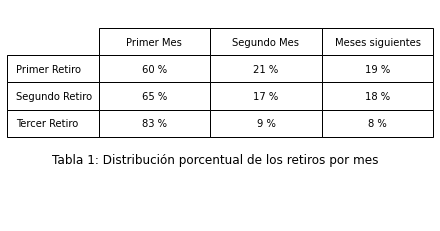

In [2]:
#@title Tabla 1: Distribución porcentual de los retiros por mes

######### INICIO DE LA TABLA #########
#Llena la lista auxiliar para mostrar los valores en porcentaje
montos_retiros_porcentaje=[]
for elementos in montos_retiros:
  r = list(map("{} %".format, elementos))
  montos_retiros_porcentaje.append(r)

#Configuración del Ploteo de la Tabla
fig, tabla =plt.subplots(1,1)
data=montos_retiros_porcentaje
column_labels=["Primer Mes", "Segundo Mes", "Meses siguientes"]
filas=["Primer Retiro", "Segundo Retiro","Tercer Retiro"]
tabla.axis('tight')
tabla.axis('off')
tabla.set_title("Tabla 1: Distribución porcentual de los retiros por mes", y=0.25, x=0.35)
tabla.table(cellText=data,colLabels=column_labels,rowLabels=filas,loc="center", cellLoc="center", bbox = [0, 0.4, 1, 0.5])
plt.show()
######### FIN DE LA TABLA #########

En la Tabla 1 se evidencia que el primer y segundo retiro presentan una distribución muy similar, con un 60% y 65% del total pagado el primer mes, y el 40% y 35% restantes se distribuye de igual forma entre el segundo mes y el resto de los meses. El tercero se escapa de la tendencia anterior, lo que se explica porque ha estado disponible solo por tres meses. Para el primer retiro se debe considerar que el plazo de solicitudes finalizó en julio de 2021.  
  
A pesar de lo anterior, se aprecia una fuerte tendencia a que el monto retirado el primer mes sea, retiro a retiro, porcentualmente muy superior a los montos pagados en los meses siguientes. Adicionalmente, en el caso del tercer retiro los porcentajes del primer y segundo mes sólo podrían bajar, conforme el de los siguientes meses aumente.  

## Variación del IPC ##  
El IPC es el índice de precios al consumidor calculado en base al costo de una canasta de productos que, dependiendo de su variación, se traduce en la inflación o deflación de la moneda.  
  
En el caso de Chile, el Banco Central es la entidad encargada de controlar las variaciones del IPC buscando, a través de políticas monetarias, que su variación anual sea de un 3%.  
  
En el Gráfico 2 se presenta la variación del IPC desde el año 2018 hasta agosto de 2021.

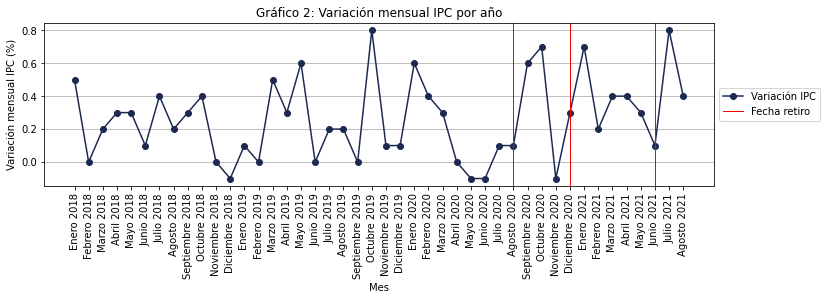

In [3]:
#@title Gráfico 2: Variación mensual del IPC del 2018 a la fecha
#Cargar Base de Datos con los valores de la variación del IPC desde enero 2018 a agosto 2021 de Chile, Perú, Brasil, EEUU y Francia
#Fuente de la información:
#Francia: https://www.insee.fr/en/statistiques/5418782#tableau-ipc-flash-g1-en    
#Brasil:
#    https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=downloads    
#Perú:
#    https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01271PM/html
#    https://www.sunat.gob.pe/indicestasas/
#Chile:
#    https://www.sii.cl/valores_y_fechas/utm/utm2021.htm
#Estados Unidos:
#    https://www.bls.gov/cpi/tables/supplemental-files/historical-cpi-u-202107.pdf




###import pandas as pd
###import matplotlib.pyplot as plt
###import numpy as np

#Se carga a un dataframe la información almacenada en el archivo de la ruta, creado para este análisis
ruta = "https://raw.githubusercontent.com/redzline/diplodocus/main/base_ipc.csv"
df1 = pd.read_csv(ruta,sep=";", decimal=",")

#Tamaño del gráfico
plt.figure(figsize=(12,3))

#Se grafica la variación del IPC de Chile.
plt.plot(np.arange(len(df1.loc[(df1['País']=='Chile')]["Variación IPC"])), df1.loc[(df1['País']=='Chile')]["Variación IPC"],"-o", label="Variación IPC" ,color=color[4])


#Agregar línea horizontal en valor 0
#plt.axhline(y=0, xmin=0, xmax=1, c="k", lw=1)

#Agregar líneas verticales en las fechas de los retiros
plt.axvline(x=(df1.loc[(df1['Año']==2020) & (df1['Mes']=="Agosto") & (df1['País']=="Chile")]).index, c="r", lw=1, label="Fecha retiro")
plt.axvline(x=(df1.loc[(df1['Año']==2020) & (df1['Mes']=="Diciembre") & (df1['País']=="Chile")]).index, c="r", lw=1)
plt.axvline(x=(df1.loc[(df1['Año']==2021) & (df1['Mes']=="Junio") & (df1['País']=="Chile")]).index, c="r", lw=1)

#Configuración del gráfico
plt.xticks(np.arange(len(df1.loc[(df1['País']=='Chile')]["Mes"])), (df1.loc[(df1['País']=='Chile')]["Mes"]).str.cat(df1.loc[(df1['País']=='Chile')]["Año"].astype(str), sep=" "), rotation = 90)
plt.ylabel('Variación mensual IPC (%)')
plt.xlabel('Mes')
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.title('Gráfico 2: Variación mensual IPC por año')
plt.grid(axis="y") 
plt.rcParams['axes.axisbelow'] = False
plt.show()

En el Gráfico 2 se observa que en el primer retiro el IPC no tiene variación respecto al mes anterior con un valor de 0.1%, el segundo retiro sí presenta un alza respecto al mes anterior con un aumento del 0.3% y en el tercer retiro el IPC es menor al mes anterior con una variación del 0.1%.  
  
Para todos los retiros, el mes siguiente al inicio de los pagos presenta una variación positiva del IPC, alcanzando un 0.6%, 0.7% y 0.8% para el primer, segundo y tercer retiro, respectivamente.  
  
Se observa que, en todos los casos, las variaciones se mueven dentro del rango de valores presentados en el período 2018 - 2019, sin salirse de los máximos y mínimos presentados en dicho período. La Tabla 2 presenta los máximos, mínimos y promedios de los períodos 2018 - 2019 y 2020 - 2021.

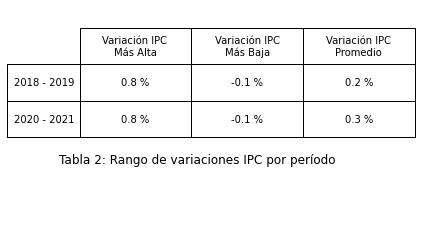

In [4]:
######### INICIO DE LA TABLA #########

#La variable variaciones guarda [variación más alta, variación más vaja, promedio variación] del IPC para un rango dado
variaciones=[]

for año in [2018,2020]:
  variaciones.append([df1.loc[((df1['Año']==año) | (df1['Año']==año+1)) & (df1['País']=="Chile")]["Variación IPC"].max(),
                      df1.loc[((df1['Año']==año) | (df1['Año']==año+1)) & (df1['País']=="Chile")]["Variación IPC"].min(),
                      round(df1.loc[((df1['Año']==año) | (df1['Año']==año+1)) & (df1['País']=="Chile")]["Variación IPC"].mean(), 1)
                     ])

#Llena la lista auxiliar para mostrar los valores en porcentaje
variaciones_porcentaje=[]
for elementos in variaciones:
  r = list(map("{} %".format, elementos))
  variaciones_porcentaje.append(r)

#Configuración del Ploteo de la Tabla
fig, tabla =plt.subplots(1,1)
data=variaciones_porcentaje
column_labels=["Variación IPC \nMás Alta", "Variación IPC\nMás Baja", "Variación IPC\nPromedio"]
filas=["2018 - 2019", "2020 - 2021"]
tabla.axis('tight')
tabla.axis('off')
tabla.set_title("Tabla 2: Rango de variaciones IPC por período", y=0.25, x=0.35)
tabla.table(cellText=data,colLabels=column_labels,rowLabels=filas,loc="center", cellLoc="center", bbox = [0, 0.4, 1, 0.5])
plt.show()
######### FIN DE LA TABLA #########

En la tabla 2 se aprecia que el rango de variación del IPC va desde los -0.1% hasta los 0.8% en ambos períodos, presentando una media similar de 0.2% y 0.3% para el 2018-2019 y 2020-2021, respectivamente.  
  
Para determinar si el aumento en el mes siguiente a los retiros está relacionado directamente con ellos, se construye el gráfico 3 que presenta la variación del IPC anualmente.

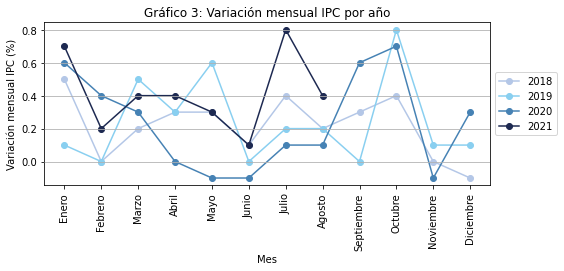

In [5]:
#@title Gráfico 3: Variación mensual del IPC del 2018 a la fecha
plt.figure(figsize=(8,3))

#Variable auxiliar para usar un color por año
i=0

#Se crea una serie para Chile por cada año. El eje X se crea para cada mes por cada año ya que el 2021 no tiene los 12 meses 
for año in df1.drop_duplicates(subset = ["Año"])["Año"]:
  plt.plot(np.arange(len(df1.loc[df1['Año']==año].drop_duplicates(subset = ["Mes"])["Mes"])), df1.loc[(df1['País']=='Chile') & (df1['Año']==año)]["Variación IPC"],"-o", label=año ,color=color[i+1])
  i+=1

#Configuración del gráfico
plt.xticks(np.arange(len(df1.drop_duplicates(subset = ["Mes"])["Mes"])), df1.drop_duplicates(subset = ["Mes"])["Mes"], rotation = 90)
plt.ylabel('Variación mensual IPC (%)')
plt.xlabel('Mes')
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.title('Variación mensual IPC por año')
plt.grid(axis="y")
plt.title('Gráfico 3: Variación mensual IPC por año')
plt.rcParams['axes.axisbelow'] = False
plt.show()

El Gráfico 2 permite identificar que la variación del IPC presenta un comportamiento anual cíclico, con una variación en el año 2020. En los meses de enero el IPC tiene un valor mayor que en febrero, el que aumenta en los meses de marzo, abril y mayo para disminuir en el mes de junio. Luego, en julio, se evidencia un aumento que se mantiene o disminuye en agosto, presentando un comportamiento variable en septiembre, pudiendo disminuir o aumentar, para subir en octubre y bajar en los meses de noviembre y diciembre.  
  
La tendencia descrita no se cumple en los meses de marzo a junio de 2020, que se puede describir como la primera ola de Covid-19 en Chile. En ese período el IPC presenta las variaciones más bajas respecto a los mismos meses de los otros años.  
  
Además, se puede identificar que en 2021 la variación del IPC sí se comporta de acuerdo a la tendencia descrita y en los rangos de valores de los otros años, sin embargo, se aprecian distribuidos en valores más altos que en los otros años.  
  
La Tabla 3 presenta la frecuencia en que se presentan variaciones del IPC iguales o menores a 0% por año.

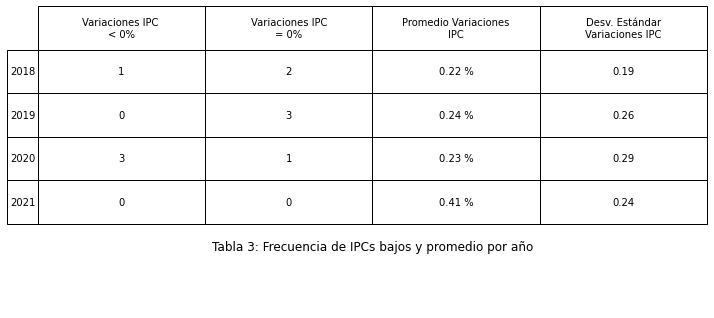

In [6]:
######### INICIO DE LA TABLA #########

#La variable variaciones_bajas guarda [frecuencia variación IPC=0, frecuencia variación IPC<0, promedio variación] del IPC para un rango dado
variaciones_bajas=[]

for año in df1.drop_duplicates(subset = ["Año"])["Año"]:
  variaciones_bajas.append([df1.loc[(df1['Año']==año) & (df1['País']=="Chile") & (df1['Variación IPC']<0)]["Variación IPC"].count(),
                      df1.loc[(df1['Año']==año) & (df1['País']=="Chile") & (df1['Variación IPC']==0)]["Variación IPC"].count(),
                      round(df1.loc[(df1['Año']==año) & (df1['País']=="Chile")]["Variación IPC"].mean(),2),
                      round(df1.loc[(df1['Año']==año) & (df1['País']=="Chile")]["Variación IPC"].std(),2)
                     ])




#Cálculos auxiliares para presentar en la tabla las frecuencias como número y la variación como porcentaje
#OPTIMIZABLE
variaciones_resumen_porcentaje_aux=[]
variaciones_resumen_porcentaje=[]
for elementos in variaciones_bajas:
  r = list(map("{} %".format, elementos))
  variaciones_resumen_porcentaje_aux.append(r)
i=0
for elementos in variaciones_bajas:
  variaciones_resumen_porcentaje.append([elementos[0],
                                         elementos[1],
                                         variaciones_resumen_porcentaje_aux[i][2],
                                         elementos[3]
                                        ])
  i+=1

    
#Configuración del Ploteo de la Tabla
fig, tabla =plt.subplots(1,1)
data=variaciones_resumen_porcentaje
column_labels=["Variaciones IPC \n< 0%", "Variaciones IPC\n= 0%", "Promedio Variaciones\nIPC", "Desv. Estándar\nVariaciones IPC"]
filas=["2018", "2019", "2020", "2021"]
tabla.axis('tight')
tabla.axis('off')
tabla.set_title("Tabla 3: Frecuencia de IPCs bajos y promedio por año", y=0.25, x=1.)
tab=tabla.table(cellText=data,colLabels=column_labels,rowLabels=filas,loc="center", cellLoc="center",bbox = [0, 0.4, 2, 1])
tab.scale(3, 1.5)
plt.show()
######### FIN DE LA TABLA #########

En la Tabla 3 se observa que en 2018 un mes tuvo una variación negativa del IPC y dos meses sin variación. En 2019 no hubo IPC negativo y en 3 meses no hubo variación. En 2020 el IPC presentó una variación negativa en tres oportunidades y un mes no tuvo variación. El promedio de la variación mensual en esos tres años fue de 0.22%, 0.24% y 0.23%, siendo todos similares y cercano a lo esperado para obtener un IPC anual de 3%.  
  
Sin embargo, desde 2021 a la fecha no han habido meses con variación 0 o negativa del IPC y el promedio alcanza el 0.41%.  
  
A nivel numérico, se puede explicar que en 2021 no ha habido variaciones altas de IPC, los que se mantienen en los rangos esperados respecto a los años anteriores. Sin embargo, el no presentar valores bajos de variación, es decir, 0% o menor, implica que el promedio se mantenga en un valor alto, de casi el doble que los años anteriores. Además que presenta una desviación estándar del orden de los años anteriores, es decir, se confirma que los datos se encuentran agrupados en valores más altos. En consecuencia la variación acumulada del IPC es alto, de acuerdo a lo presentado en el Gráfico 4.

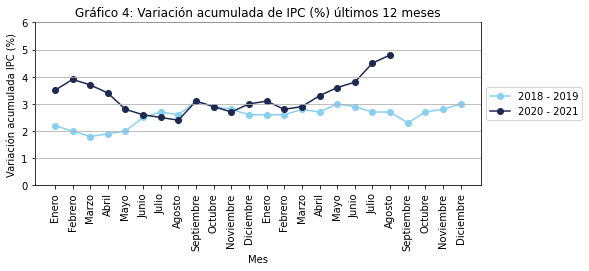

In [7]:
#AGREGAR GRÁFICO IPC ACUMULADO

ruta = "https://raw.githubusercontent.com/redzline/diplodocus/main/base_ipc_acum.csv"
df3 = pd.read_csv(ruta,sep=";", decimal=",")

plt.figure(figsize=(8,3))

i=0
for año in [2018,2020]:
  plt.plot(np.arange(len(df3.loc[df3['Año']==año].drop_duplicates(subset = ["Mes"])["Mes"]) + len(df3.loc[df3['Año']==año+1].drop_duplicates(subset = ["Mes"])["Mes"])), df3.loc[(df3['País']=='Chile') & ((df3['Año']==año) | (df3['Año']==año+1))]["Variación IPC 12m"],"-o", label=str(año)+" - "+str(año+1) ,color=color[i+2])
  i+=2


#Configuración del gráfico
plt.xticks(np.arange(len(df3.loc[((df3['País']=='Chile') & (df3['Año']<2020))]["Mes"])), (df3.loc[((df3['País']=='Chile') & (df3['Año']<2020))]["Mes"]), rotation = 90)
plt.ylabel('Variación acumulada IPC (%)')
plt.xlabel('Mes')
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.title('Gráfico 4: Variación acumulada de IPC (%) últimos 12 meses')
plt.ylim([0.0, 6.0])
plt.grid(axis="y") 
plt.show()

De acuerdo al Gráfico 4, se puede identificar que el IPC acumulado de los últimos 12 meses durante 2018 se mantiene en una leve alza hasta el mes de septiembre, donde su valor se mantiene estable entre 2% y 3%, con el valor más bajo en septiembre de 2019. A partir de ese mes, hasta marzo de 2020 se comporta en alza, sobrepasando los últimos dos meses el 3%. Luego de marzo la variación tiende a bajar hasta el mes de agosto, tomando su valor más bajo. Posteriormente, desde septiembre hasta marzo de 2021 el valor se mantiene relativamente estable en torno al 3%, donde comienza un alza continua hasta alcanzar un 4.8%.  
  
El valor de la variación acumulada de los últimos 12 meses en marzo de 2021 es el primer mes que recoge solo variaciones que se produjeron en pandemia y coincide con el inicio de un alza sostenida en el tiempo hasta el día de hoy, de acuerdo a lo presentado en la Tabla 3.  


## Inflación en otros países ##  
Para identificar si el aumento en la inflación se trata de una situación que ocurre solamente en Chile, se debe comparar con el de otros países, tanto emergentes como no. El gráfico 5 presenta la variación del IPC acumulado de los últimos meses para EEUU, Brasil, Francia, Perú y Chile.

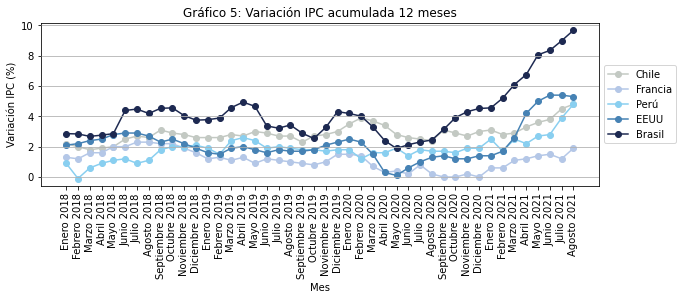

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Se carga a un dataframe la información almacenada en el archivo de la ruta, creado para este análisis
ruta = "https://raw.githubusercontent.com/redzline/diplodocus/main/base_ipc_paises.csv"
df4 = pd.read_csv(ruta,sep=";", decimal=",")

#Tamaño del gráfico
plt.figure(figsize=(10,3))

i=0
for pais in df4.drop_duplicates(subset = ["País"])["País"]:
  plt.plot(np.arange(len(df4.loc[(df4['País']==pais)]["Variación IPC 12m"])), df4.loc[(df4['País']==pais)]["Variación IPC 12m"],"-o", label=pais ,color=color[i])
  i+=1
    
plt.rcParams['axes.axisbelow'] = True
plt.xticks(np.arange(len(df4.loc[(df4['País']=='Chile')]["Mes"])), (df4.loc[(df4['País']=='Chile')]["Mes"]).str.cat(df4.loc[(df4['País']=='Chile')]["Año"].astype(str), sep=" "), rotation = 90)
plt.ylabel('Variación IPC (%)')
plt.xlabel('Mes')
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.title('Gráfico 5: Variación IPC acumulada 12 meses')
plt.grid(axis="y") 
plt.show()

Del Gráfico 5 se concluye que la tendencia a la inflación es compartida tanto en países de economías emergentes como en países desarrollados. En el caso de Brasil, EEUU y Francia que venían presentando tendencias a la baja, pasan a tener un importante aumento durante 2020. Lo mismo ocurre para Chile y Perú que presentaban valores estables en torno a un 2% y 3%, pasando a alcanzar en agosto 4,8% ambos países.

# Conclusiones #

De acuerdo a lo analizado en los puntos anteriores, se concluye que:
* Chile presenta un alza en el IPC acumulado en los últimos 12 que alcanza un 4.8% en agosto de 2021 superando el objetivo del Banco Central del 3% anual.
* Las variaciones del IPC presentan un comportamiento cíclico que se ha mantenido en el tiempo, a excepción del período marzo - junio de 2020 que coincide con el inicio del Covid-19. La tendencia continúa en 2021 con valores dentro de los rangos presentados desde 2018 a la fecha, pero que, en promedio, son mayores a los años anteriores.
* En los tres retiros de fondos de las AFP, del total retirado, más del 60% se paga el primer mes, cerca de 20% el segundo mes y el 20% restante en los siguientes meses. A la fecha sólo han cerrado las solicitudes del primer retiro.
* En cada retiro no se presenta evidencia de cambios en la tendencia de la inflación en el primer mes de pago. El mes siguiente a los inicios de pagos se presentan valores altos en el IPC, los cuales no presentan evidencia de ser causados por los retiros ya que son esperables dentro del comportamiento cíclico y están dentro del rango esperable.
* El alza de la inflación no es un proceso local en Chile, y se presenta tanto en países de economías emergentes como desarrollados, y en distintos continentes.
* **No hay evidencia de que los retiros de fondos desde las AFP sean la causa de la inflación en Chile**. 